# Toybox High Aspect Ratio equilibirum



In [1]:
import numpy as np
from pyoculus.fields import AnalyticCylindricalBfield
from pyoculus.maps import CylindricalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
bfield = AnalyticCylindricalBfield(6, 0, 1, 0.5)

In [4]:
section = CylindricalBfieldSection(bfield, R0=6, Z0=0, rtol=1e-12, nsteps=1e4)

### Plotting the unperturbed equilibrium 

In [5]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)

In [6]:
pplot.compute(compute_iota=True)

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


array([[[ 6.00000001e+00,  0.00000000e+00],
        [ 6.00000001e+00,  1.97864149e-12],
        [ 6.00000001e+00,  3.95125526e-12],
        ...,
        [ 6.00000001e+00,  3.05520760e-10],
        [ 6.00000001e+00,  3.06975242e-10],
        [ 6.00000001e+00,  3.08440231e-10]],

       [[ 6.11111112e+00,  0.00000000e+00],
        [ 6.11102547e+00, -4.36193937e-03],
        [ 6.11076865e+00, -8.71703186e-03],
        ...,
        [ 6.02245989e+00, -1.08817435e-01],
        [ 6.01823459e+00, -1.09604656e-01],
        [ 6.01398500e+00, -1.10227495e-01]],

       [[ 6.22222223e+00,  0.00000000e+00],
        [ 6.21948580e+00, -3.47664339e-02],
        [ 6.21135333e+00, -6.86475727e-02],
        ...,
        [ 6.02122708e+00,  2.21206081e-01],
        [ 6.05457642e+00,  2.15416188e-01],
        [ 6.08682935e+00,  2.04556552e-01]],

       ...,

       [[ 6.77777778e+00,  0.00000000e+00],
        [ 5.98564203e+00, -7.77645243e-01],
        [ 5.23714825e+00, -1.51642639e-01],
        ...,
     

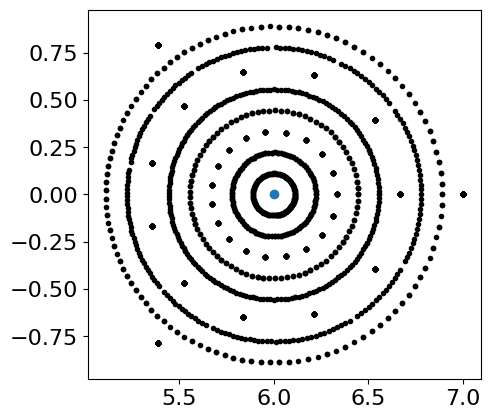

In [7]:
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)

In [8]:
pplot.compute_iota()

(array([[6.00000001, 0.        ],
        [6.11111112, 0.        ],
        [6.22222223, 0.        ],
        [6.33333334, 0.        ],
        [6.44444445, 0.        ],
        [6.55555556, 0.        ],
        [6.66666667, 0.        ],
        [6.77777778, 0.        ],
        [6.88888889, 0.        ],
        [7.        , 0.        ]]),
 array([1.        , 0.99386166, 0.9759026 , 0.94736583, 0.91011238,
        0.86630962, 0.81818035, 0.76777123, 0.7168138 , 0.66666666]))

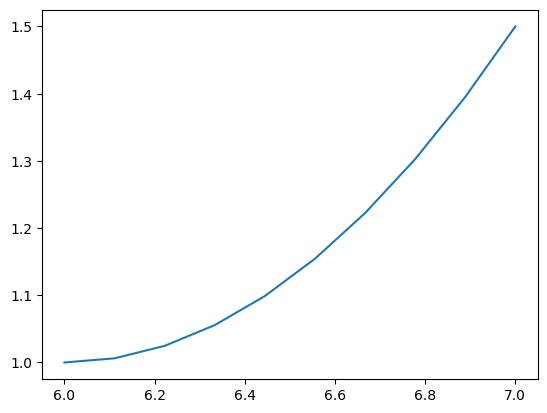

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

## Adding the maxwellian perturbation

In [10]:
maxwellboltzmann = {"R": section.R0, "Z": section.Z0,
                    "m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
bfield.add_perturbation(maxwellboltzmann)

section.clear_cache()
section.find_axis()

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6. 0.]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [0. 0.]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6. 0.]. Computing additional data...


In [11]:
fp_x1 = FixedPoint(section)
guess = [5.05, 0]

fp_x1.find(3, guess)
# fp01.find_with_iota(0, 1, guess)

fp_x1._found_by_iota = True
fp_x1._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [5.05 0.  ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [ 0.26576426 -0.44516152]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step : [-0.07551086 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [ 4.97448914 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - delta_x : [-0.00742598  0.29070084]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step : [0.03294384 0.09750858]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [ 5.00743299 -0.02382449]
INFO:pyoculus.solvers.fixed_point:Newton 2 - delta_x : [-0.01320026  0.09889978]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step : [0.01069784 0.01841836]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [ 5.01813083 -0.00540613]
INFO:pyoculus.solvers.fixed_point:Newton 3 - delta_x : [0.00193401 0.00457579]
INFO:pyoculus.solvers.fixed_point:Newton 3 - step : [0.0019237  0.00543216]
INFO:pyoculus.solvers.fixed_point:Newton 4 - x : [5.02005453e+00 2.60268729e-05]
INFO:

(<Figure size 640x480 with 1 Axes>, <Axes: >)

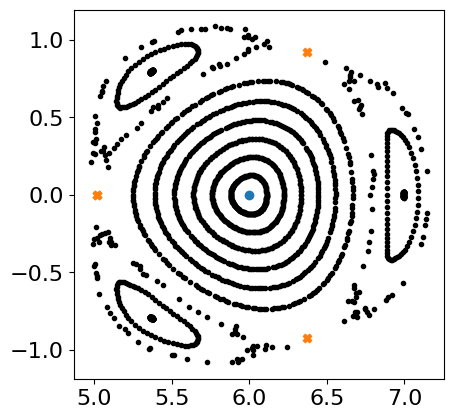

In [12]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)
pplot.compute(compute_iota=True)
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)
fp_x1.plot(ax=ax)

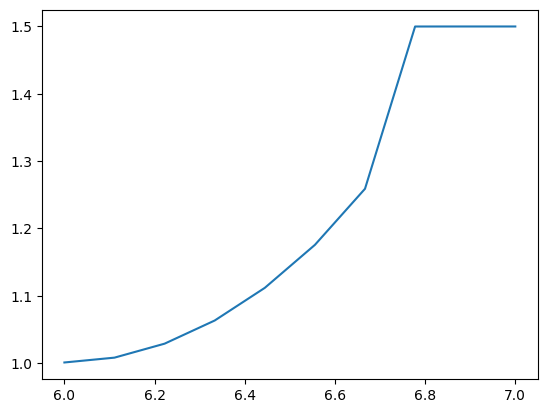

In [13]:
pplot.compute_iota()
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

In [14]:
fp_x2 = FixedPoint(section)

fp_x2.find(3, fp_x1.coords[1])
# fp01.find_with_iota(0, 1, guess)

fp_x2._found_by_iota = True
fp_x2._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6.37050595 0.92340241]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [-1.83941751e-12  2.20268248e-13]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6.37050595 0.92340241]. Computing additional data...


(<Figure size 640x480 with 1 Axes>, <Axes: >)

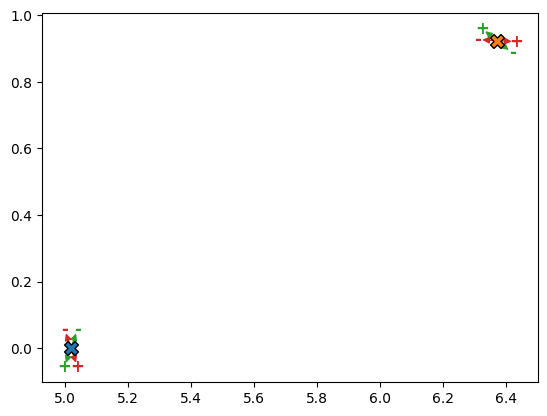

In [15]:
Manifold.show_directions(fp_x1, fp_x2)

### Inner turnstile

In [16]:
inner_manifold = Manifold(section, fp_x1, fp_x2, '-', '-', True)

In [17]:
inner_manifold.compute(nint_s=8, nint_u=8)
inner_manifold.plot("stable", rm_points=4, ax=ax)
inner_manifold.plot("unstable", rm_points=4, ax=ax)

INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 2.45036e-07.
INFO:pyoculus.solvers.manifold:Computing stable manifold...
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 2.24667e-07.
INFO:pyoculus.solvers.manifold:Computing unstable manifold...


(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [18]:
inner_manifold.find_clinics(1e-4, 1e-4, n_points=4)

INFO:pyoculus.solvers.manifold:Search 1/4 - initial guess for epsilon pair (eps_s, eps_u): (0.0001, 0.0001)
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 4.172e-05, 3.179e-05 gives a difference of [ 2.12869722e-11 -6.67506050e-11].
INFO:pyoculus.solvers.manifold:Search 2/4 - initial guess for epsilon pair (eps_s, eps_u): [0.00028557423785638674, 6.035445283601447e-05]
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 2.856e-04, 6.035e-05 gives a difference of [2.74980039e-12 2.47246668e-13].
INFO:pyoculus.solvers.manifold:Search 3/4 - initial guess for epsilon pair (eps_s, eps_u): [0.00015040781648379553, 0.00011459295981320541]
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 1.5

In [19]:
inner_manifold.plot_clinics(ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

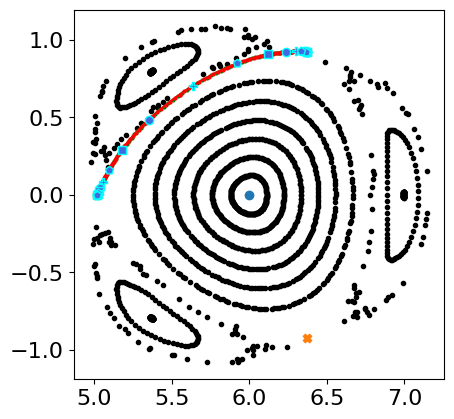

In [20]:
fig

In [21]:
inner_manifold.compute_turnstile_areas()

INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-6.077e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (4.172208818634476e-05, 3.178781648604319e-05)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-6.996e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (0.0002856138020470443, 6.0353074820555204e-05)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.005e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (0.0001504182602883673, 0.00011459888506296517)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.008e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (7.92161816587736e-05, 0.00021760195543870522)


array([-0.91904605, -0.00860946, -0.00251387,  0.93096608])

### Outer turnstile

In [22]:
outer_manifold = Manifold(section, fp_x1, fp_x2, '+', '-', False)

In [23]:
outer_manifold.compute(nint_s=8, nint_u=8)
outer_manifold.plot("stable", rm_points=50, ax=ax)
outer_manifold.plot("unstable", rm_points=50, ax=ax)

INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 2.29930e-07.
INFO:pyoculus.solvers.manifold:Computing stable manifold...
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 2.13630e-07.
INFO:pyoculus.solvers.manifold:Computing unstable manifold...


(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [24]:
outer_manifold.find_clinics(1e-4, 1e-4, n_points=4)

INFO:pyoculus.solvers.manifold:Search 1/4 - initial guess for epsilon pair (eps_s, eps_u): (0.0001, 0.0001)
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 4.249e-05, 8.061e-05 gives a difference of [-1.13217880e-10 -3.82822662e-11].
INFO:pyoculus.solvers.manifold:Search 2/4 - initial guess for epsilon pair (eps_s, eps_u): [0.0002907941160283741, 0.00015304620854109856]
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 2.789e-04, 1.468e-04 gives a difference of [-4.64606131e-12 -2.44045339e-11].
INFO:pyoculus.solvers.manifold:Search 3/4 - initial guess for epsilon pair (eps_s, eps_u): [0.00015315705074253565, 0.00029058366368678437]
INFO:pyoculus.solvers.manifold:Root search status : The solution converged.
INFO:pyoculus.solvers.manifold:Success! Found epsilon pair (eps_s, eps_u) : 1

In [25]:
outer_manifold.plot_clinics(ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

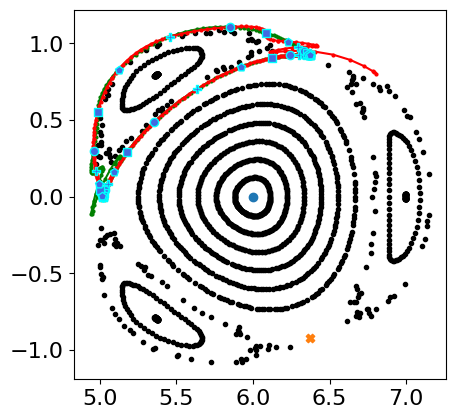

In [26]:
fig

In [28]:
outer_manifold.compute_turnstile_areas()

INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.036e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (4.248577219401968e-05, 8.06072222079658e-05)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.019e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (0.0002789495339893526, 0.0001468363268361961)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.019e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (0.00015314299030208422, 0.0002905444718697197)
INFO:pyoculus.solvers.manifold:Lagrangian value obtained (-7.019e+00) for homo/hetero-clinic trajectory (eps_s, eps_u) : (7.739408487078329e-05, 0.0005292051644143358)


array([ 1.80854464e-02, -1.24130903e-05,  1.24131260e-05, -1.72331222e-02])